<a href="https://colab.research.google.com/github/Reinaldos/Reinaldos/blob/main/Pr%C3%B3j_5_7_Qual_%C3%A9_o_valor_total_de_gastos_por_estado%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color = #87CEEB > Análise exploratória relacionada a Cota para o Exercício da Atividade Parlamentar dos anos de 2019,2020 e 2021**

###<font color = orange> **Fonte de Dados Utilizada** 

*   Site oficial da câmara dos deputados - [Portal](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar)
*   Base de Dados CEAP referente aos anos de 2019,2020 e 2021

#<font color = #87CEEB> **1. O que é CEAP?**

Resumidamente CEAP é a Cota para o Exercício da Atividade Parlamentar (CEAP), instituída pelo Ato da Mesa n. 43/2009, destina-se a custear gastos exclusivamente vinculados ao exercício do mandato, observados os limites mensais estabelecidos de acordo com o estado de origem do parlamentar, atendendo assim uma série de despesas

# Questões a serem respondidas

#7. Qual é o valor total de gastos por estado?

# Importação de todas as bibliotecas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.ticker import StrMethodFormatter

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Importação dos arquivos direto do meu google Drive

In [5]:
dfparlamentar2019 = pd.read_csv('/content/drive/My Drive/Ano-2019.csv', sep = ';')
dfparlamentar2020 = pd.read_csv('/content/drive/My Drive/Ano-2020.csv', sep = ';')
dfparlamentar2021 = pd.read_csv('/content/drive/My Drive/Ano-2021.csv', sep = ';')

# Concatenando os dataframes dos anos de 2019 e 2020 utilizando merge e atribuindo à variável df_parlamentar.

In [6]:
df_parlamentar = pd.merge(dfparlamentar2019, dfparlamentar2020, how='outer')

# Concatenando os dataframes df_parlamentar e dfparlamentar2021 utilizando merge e atribuindo à nova variável dfparlamentar.

In [7]:
dfparlamentar = pd.merge(df_parlamentar, dfparlamentar2021, how='outer')
dfparlamentar

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
555496,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
555497,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
555498,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


#Informação sobre os dados do DataFrame parlamentares apenas concatenado os 3 anos. Sem nenhuma limpeza.

In [8]:
dfparlamentar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 555499
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

codLegislatura 

# Apaguei as colunas que não tem relação com gastos de valores utilizando .drop()
Ps:. Apaguei somente da tabela dfparlamentar que está apenas concatenada.

In [9]:
parlamentar_drop_colunas = dfparlamentar.drop(columns=['ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'numParcela', 'datEmissao', 'codLegislatura', 'numEspecificacaoSubCota', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'txtPassageiro', 'numLote', 'numRessarcimento', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'])
parlamentar_drop_colunas
# Da linha 15 até a linha 878 é só liderança de partidos.

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,111.30,0.0,111.30,1,2019,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,5000.00,0.0,5000.00,7,2021,NaN,NaN
555496,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,7000.00,0.0,7000.00,8,2021,NaN,NaN
555497,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,4000.00,0.0,4000.00,7,2021,NaN,NaN
555498,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,1.10,0.0,1.10,7,2021,NaN,NaN


# Filtro da coluna vlLiquido exibindo somente o que for >0.

In [10]:
liq_valor_positivo = parlamentar_drop_colunas[parlamentar_drop_colunas['vlrLiquido']>0]
liq_valor_positivo

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,111.30,0.0,111.30,1,2019,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,5000.00,0.0,5000.00,7,2021,NaN,NaN
555496,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,7000.00,0.0,7000.00,8,2021,NaN,NaN
555497,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,4000.00,0.0,4000.00,7,2021,NaN,NaN
555498,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,1.10,0.0,1.10,7,2021,NaN,NaN


In [11]:
liq_valor_positivo.info() 
# 1.741 sgUF sem UF
# 1.741 sgPartido sem partido

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521568 entries, 0 to 555499
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          521568 non-null  object 
 1   cpf                        519754 non-null  float64
 2   sgUF                       519827 non-null  object 
 3   sgPartido                  519827 non-null  object 
 4   numSubCota                 521568 non-null  int64  
 5   txtDescricao               521568 non-null  object 
 6   txtDescricaoEspecificacao  136110 non-null  object 
 7   vlrDocumento               521568 non-null  float64
 8   vlrGlosa                   521568 non-null  float64
 9   vlrLiquido                 521568 non-null  float64
 10  numMes                     521568 non-null  int64  
 11  numAno                     521568 non-null  int64  
 12  txtTrecho                  94860 non-null   object 
 13  vlrRestituicao             0 

# O vlrLiquido expõe o gasto total por estado em ordem decrescente.

In [14]:
gasto_total_estado = liq_valor_positivo.groupby('sgUF').sum().sort_values('vlrLiquido', ascending=False).reset_index()
gasto_total_estado.head(11)

,sgUF,cpf,numSubCota,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,vlrRestituicao
0,SP,1.694832e+15,16439423,56282744.39,214041.99,56018765.12,480852,161273341,0.0
1,MG,2.304158e+15,11349030,44605662.58,209994.19,44332329.78,387127,127831011,0.0
2,BA,1.114234e+15,8957044,42074737.21,215105.68,41814441.90,244971,82114974,0.0
3,RJ,1.258920e+15,11674160,39676968.16,159295.89,39462315.62,282061,94992215,0.0
4,PR,1.322274e+15,7491246,28345046.12,139216.67,28143234.00,237590,80277548,0.0
5,RS,1.880056e+15,6760552,27006226.84,134484.32,26809293.87,284905,93666331,0.0
6,PE,7.815938e+14,5679527,24316837.82,130746.33,24178001.35,152115,51299730,0.0
7,CE,7.656823e+14,5453703,23924760.69,92832.80,23773169.28,107211,35640656,0.0
8,MA,5.740550e+14,3165590,19373234.95,120505.39,19240191.49,79944,26503930,0.0
9,PA,2.963157e+14,3874926,17915992.66,84076.52,17817430.51,76131,25830474,0.0


In [15]:
gasto_total_estado[['sgUF','vlrLiquido']].groupby(['sgUF']).sum().sort_values(by=['vlrLiquido'], ascending = False).reset_index()

,sgUF,vlrLiquido
0,SP,56018765.12
1,MG,44332329.78
2,BA,41814441.90
3,RJ,39462315.62
4,PR,28143234.00
5,RS,26809293.87
6,PE,24178001.35
7,CE,23773169.28
8,MA,19240191.49
9,PA,17817430.51


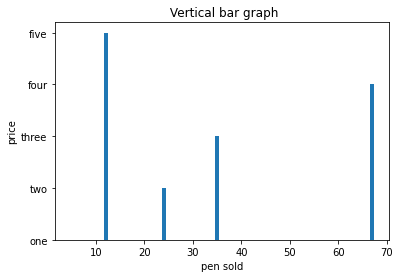

In [20]:
x=[5, 24, 35, 67, 12] 
y=['one', 'two', 'three', 'four', 'five']  
plt.bar(x, y) 
plt.xlabel("pen sold")  
plt.ylabel("price")    
plt.title(" Vertical bar graph") 
plt.show() 

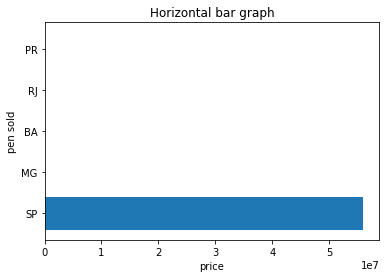

In [30]:
y=['SP', 'MG', 'BA', 'RJ', 'PR',] 
x=[56018765,24,35,67,12]  
plt.barh(y, x) 
plt.ylabel("pen sold") 
plt.xlabel("price")  
plt.title("Horizontal bar graph") 
plt.show() 

In [ ]:
y=['SP', 'MG', 'BA', 'RJ', 'PR', 'RS', 'PE', 'CE', 'MA', 'PA', 'GO', 'PB', 'PI', 'AC', 'SC', 'AP', 'AM', 'AL', 'RR', 'SE', 'ES', 'TO', 'RN', 'MT', 'MS', 'RO', 'DF'] 
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,]  
plt.barh(y, x) 
plt.ylabel("pen sold") 
plt.xlabel("price")  
plt.title("Horizontal bar graph") 
plt.show() 

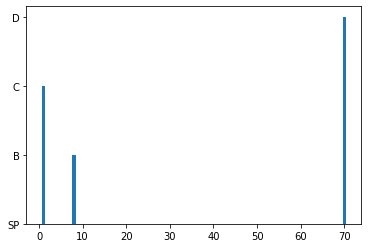

In [32]:
x = np.array([10, 8, 1, 70])
y = np.array(['SP', 'B', 'C', 'D'])

plt.bar(x, y)
plt.show()

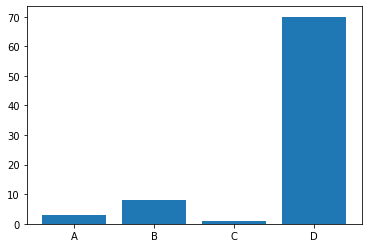

In [16]:
x = np.array(['A', 'B', 'C', 'D'])
y = np.array([3, 8, 1, 70])

plt.bar(x, y)
plt.show()

*******************************************************************************

*******************************************************************************

*******************************************************************************

*******************************************************************************

In [ ]:
# dfparlamentar['txNomeParlamentar'].unique() # necessário eliminar LIDMIN e LID.GOV-CD pois estes estão constando na lista de parlamentares mesmo não representando a liderança de nenhum partido.

In [ ]:
# so_lideranca_avante = liq_valor_positivo['txNomeParlamentar'] == "LIDERANÇA DO AVANTE"
# filtro_parlamentar3 = liq_valor_positivo[so_lideranca_avante]
# filtro_parlamentar3
# # filtro por LIDERANÇA DO AVANTE (acredito que seja líder do partido)
# # do index 15 até 63. Totalizando 50 linhas de gastos sem informação de estado.

In [ ]:
# so_LIDMIN = liq_valor_positivo['txNomeParlamentar']=="LIDMIN"
# filtro_parlamentar2 = liq_valor_positivo[so_LIDMIN]
# filtro_parlamentar2
# # filtro por LIDMIN (acredito que seja lider de ministério)
# # do index 879 até 904, index 289363 até 289363, index 450319 até 450338. Totalizando 67 linhas de gastos sem informação de partido ou estado.

In [ ]:
# filtro_parlamentar3.info()

In [ ]:
# so_lideranca_solidariedade = liq_valor_positivo['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE"
# filtro_parlamentar4 = liq_valor_positivo[so_lideranca_solidariedade]
# filtro_parlamentar4
# # Filtro por liderança do partido Solidariedade. 
# # Do indes 770 até 878  e do index 289337 até 450318

In [ ]:
# sem_Lid = dfparlamentar['txNomeParlamentar']['LID.GOV-CD'].drop()

In [ ]:
# LIDMIN_e_LID_GOV_CD = dfparlamentar[dfparlamentar['txNomeParlamentar'].str.match('LIDERANÇA')].unique()

In [ ]:
# def valor_total_de_gasto_estado(df):
#     return df[['sgUF','vlrDocumento']].groupby(['sgUF']).sum().sort_values(by=['vlrDocumento'])

In [ ]:
# df['city'] = df['city'].map({'berlin':'dubai',
#                              'paris':'moscow',
#                              'roma':'milan',
#                              np.nan:'NY'},
#                              na_action=None)
# df['colu3'].str.replace('a', 'SP')
# print(df)

# <font color="red"> Exibir todos os valores da coluna txNomeParlamentar e localizar tudo que tem LIDERANÇA

In [ ]:
# data = {'name':['michael','louis','jack','jasmine', 'amanda', 'gustavo', 'vaiVai', 'diego', 'vaness'],
#        'city':['berlin','berlin', 'paris','paris','paris','roma','roma', 'roma', np.nan],}
# df = pd.DataFrame(data,columns=['name','city', 'colu3'])
# print(df)

In [ ]:
# df['city'].str.replace('a', 'SP')

In [ ]:
# gasto_total_estado = liq_valor_positivo[['sgUF','vlrLiquido']].groupby(['sgUF']).sum().sort_values(by=['vlrLiquido']).ascending=False.reset_index()
# gasto_total_estado

       'PASSAGEM AÉREA - SIGEPA',
       'SERVIÇOS POSTAIS', 'PASSAGEM AÉREA - RPA',


In [ ]:
# atribuindo_UF = parlamentar_drop_colunas['Partido']= np.where(parlamentar_drop_colunas['nomeparlamentar'] == "nome da liderança", 'sigla do partido', parlamentar_drop_colunas.Partido)

In [ ]:
# dfparlamentar['txtDescricao'].unique()

In [ ]:
# so_LID_GOV_CD = liq_valor_positivo['txNomeParlamentar'] == "LID.GOV-CD"
# filtro_parlamentar1 = liq_valor_positivo[so_LID_GOV_CD]
# filtro_parlamentar1
# # filtro por LID.GOV-CD (acredito que seja lider governamental de sei lá o que)
# # do index 0 até 14. Totalizando 15 linhas de gastos sem informação de partido ou estado.